# LOAN STATUS CLASSIFICATION

Loan status classification is a task within the domain of machine learning and predictive analytics that involves developing models to predict the status of loan applications. The goal is to automatically categorize whether a loan application will be approved or denied based on various input features. These features typically include financial indicators such as income, credit score, loan amount, and other relevant factors.
        By leveraging historical data, machine learning models can learn patterns and relationships that help in assessing the creditworthiness of applicants, ultimately contributing to more efficient and accurate loan approval processes.
    

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## DATA LOADING

In [6]:
train = pd.read_csv('credit_train.csv')
train.head()


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [7]:
train.shape

(100514, 19)

In [8]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

# Data Cleaning

In [9]:
train.isnull().sum()
#there are many null objects in the dataset

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [10]:
# Identify if there are any missing values in the dataset.
(train.isnull().sum()/train.shape[0])*100

Loan ID                          0.511372
Customer ID                      0.511372
Loan Status                      0.511372
Current Loan Amount              0.511372
Term                             0.511372
Credit Score                    19.567423
Annual Income                   19.567423
Years in current job             4.711781
Home Ownership                   0.511372
Purpose                          0.511372
Monthly Debt                     0.511372
Years of Credit History          0.511372
Months since last delinquent    53.380624
Number of Open Accounts          0.511372
Number of Credit Problems        0.511372
Current Credit Balance           0.511372
Maximum Open Credit              0.513361
Bankruptcies                     0.714328
Tax Liens                        0.521320
dtype: float64

- The most null values are found in Months since last delinquent,Credit score, Annual Income,Years in current job.

In [11]:
# making a copy of the dataset
train_data = train.copy()

- The percentage of null values in column (Months since last delinquent) is more so dropping the column

In [12]:
train_data=train_data.drop('Months since last delinquent',axis=1)

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan ID                    100000 non-null  object 
 1   Customer ID                100000 non-null  object 
 2   Loan Status                100000 non-null  object 
 3   Current Loan Amount        100000 non-null  float64
 4   Term                       100000 non-null  object 
 5   Credit Score               80846 non-null   float64
 6   Annual Income              80846 non-null   float64
 7   Years in current job       95778 non-null   object 
 8   Home Ownership             100000 non-null  object 
 9   Purpose                    100000 non-null  object 
 10  Monthly Debt               100000 non-null  float64
 11  Years of Credit History    100000 non-null  float64
 12  Number of Open Accounts    100000 non-null  float64
 13  Number of Credit Problems  10

In [14]:
# Drop unnecessary columns
train_data.drop(columns=['Loan ID'],inplace=True)
train_data.drop(columns=['Customer ID'],inplace=True)


In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan Status                100000 non-null  object 
 1   Current Loan Amount        100000 non-null  float64
 2   Term                       100000 non-null  object 
 3   Credit Score               80846 non-null   float64
 4   Annual Income              80846 non-null   float64
 5   Years in current job       95778 non-null   object 
 6   Home Ownership             100000 non-null  object 
 7   Purpose                    100000 non-null  object 
 8   Monthly Debt               100000 non-null  float64
 9   Years of Credit History    100000 non-null  float64
 10  Number of Open Accounts    100000 non-null  float64
 11  Number of Credit Problems  100000 non-null  float64
 12  Current Credit Balance     100000 non-null  float64
 13  Maximum Open Credit        99

In [16]:
# Identify if there are any duplicates in the dataset.
train_data.duplicated().sum()

10728

In [17]:
# Drop duplicates
train_data.drop_duplicates(inplace=True)

# Data Preprocessing and EDA

<Axes: >

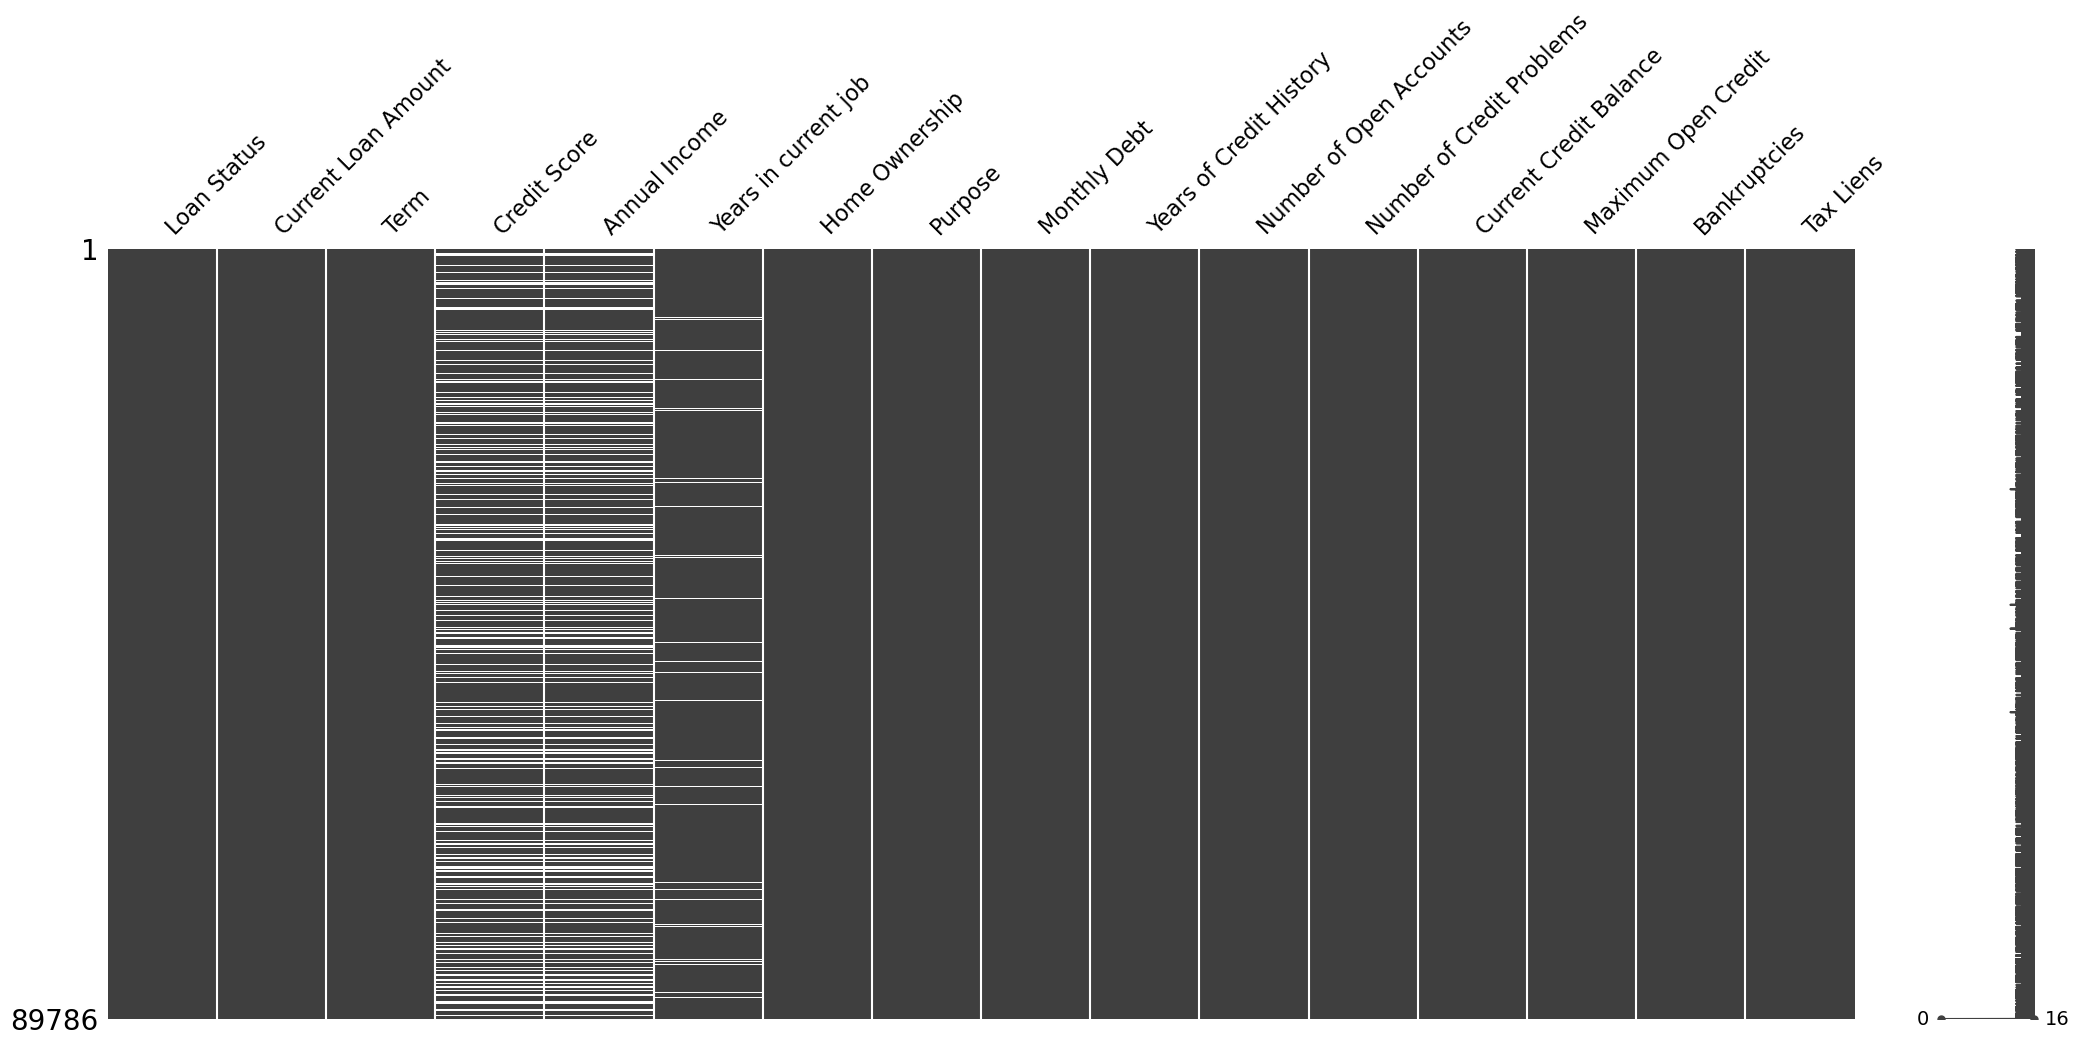

In [18]:
import missingno  as msno
msno.matrix(train_data)

<Axes: >

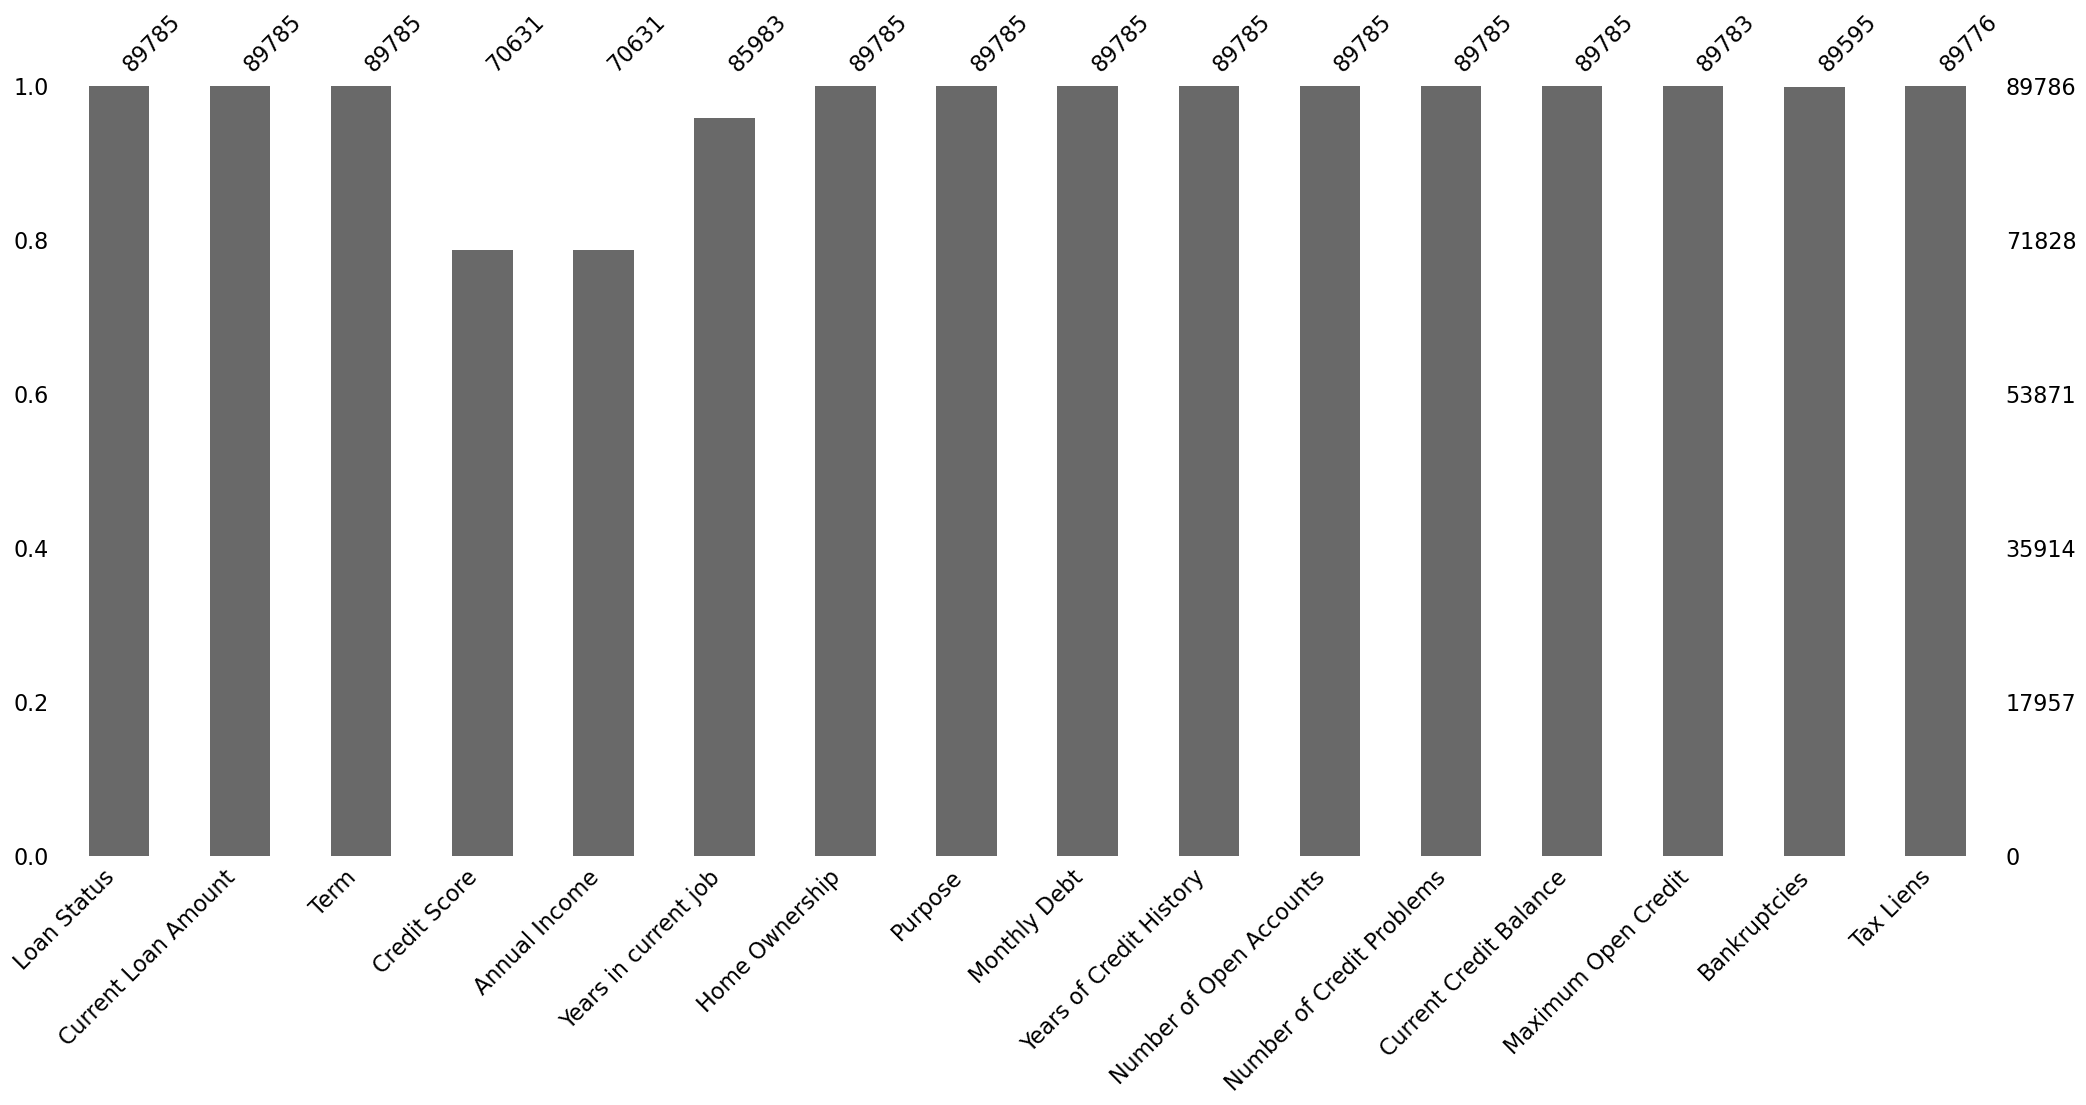

In [19]:
msno.bar(train_data)

In [20]:
#converting Years in current job column to numerical type
train_data['Years in current job']=train_data['Years in current job'].str.extract(r"(\d+)")	

In [21]:
# converting Years in current job column to numerical type
train_data = train_data.astype({"Years in current job":"float64"})

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89786 entries, 0 to 100000
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan Status                89785 non-null  object 
 1   Current Loan Amount        89785 non-null  float64
 2   Term                       89785 non-null  object 
 3   Credit Score               70631 non-null  float64
 4   Annual Income              70631 non-null  float64
 5   Years in current job       85983 non-null  float64
 6   Home Ownership             89785 non-null  object 
 7   Purpose                    89785 non-null  object 
 8   Monthly Debt               89785 non-null  float64
 9   Years of Credit History    89785 non-null  float64
 10  Number of Open Accounts    89785 non-null  float64
 11  Number of Credit Problems  89785 non-null  float64
 12  Current Credit Balance     89785 non-null  float64
 13  Maximum Open Credit        89783 non-null  float64

In [23]:
# Create KNNImputer instance to fill missing values - This will add to the null values considering the values of the neighbour

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5) 

In [24]:
# Fit and transform the imputer on the data
columns_to_impute = ['Credit Score', 'Annual Income','Years in current job']  # List of columns to impute
train_data[columns_to_impute] = imputer.fit_transform(train_data[columns_to_impute])

<Axes: >

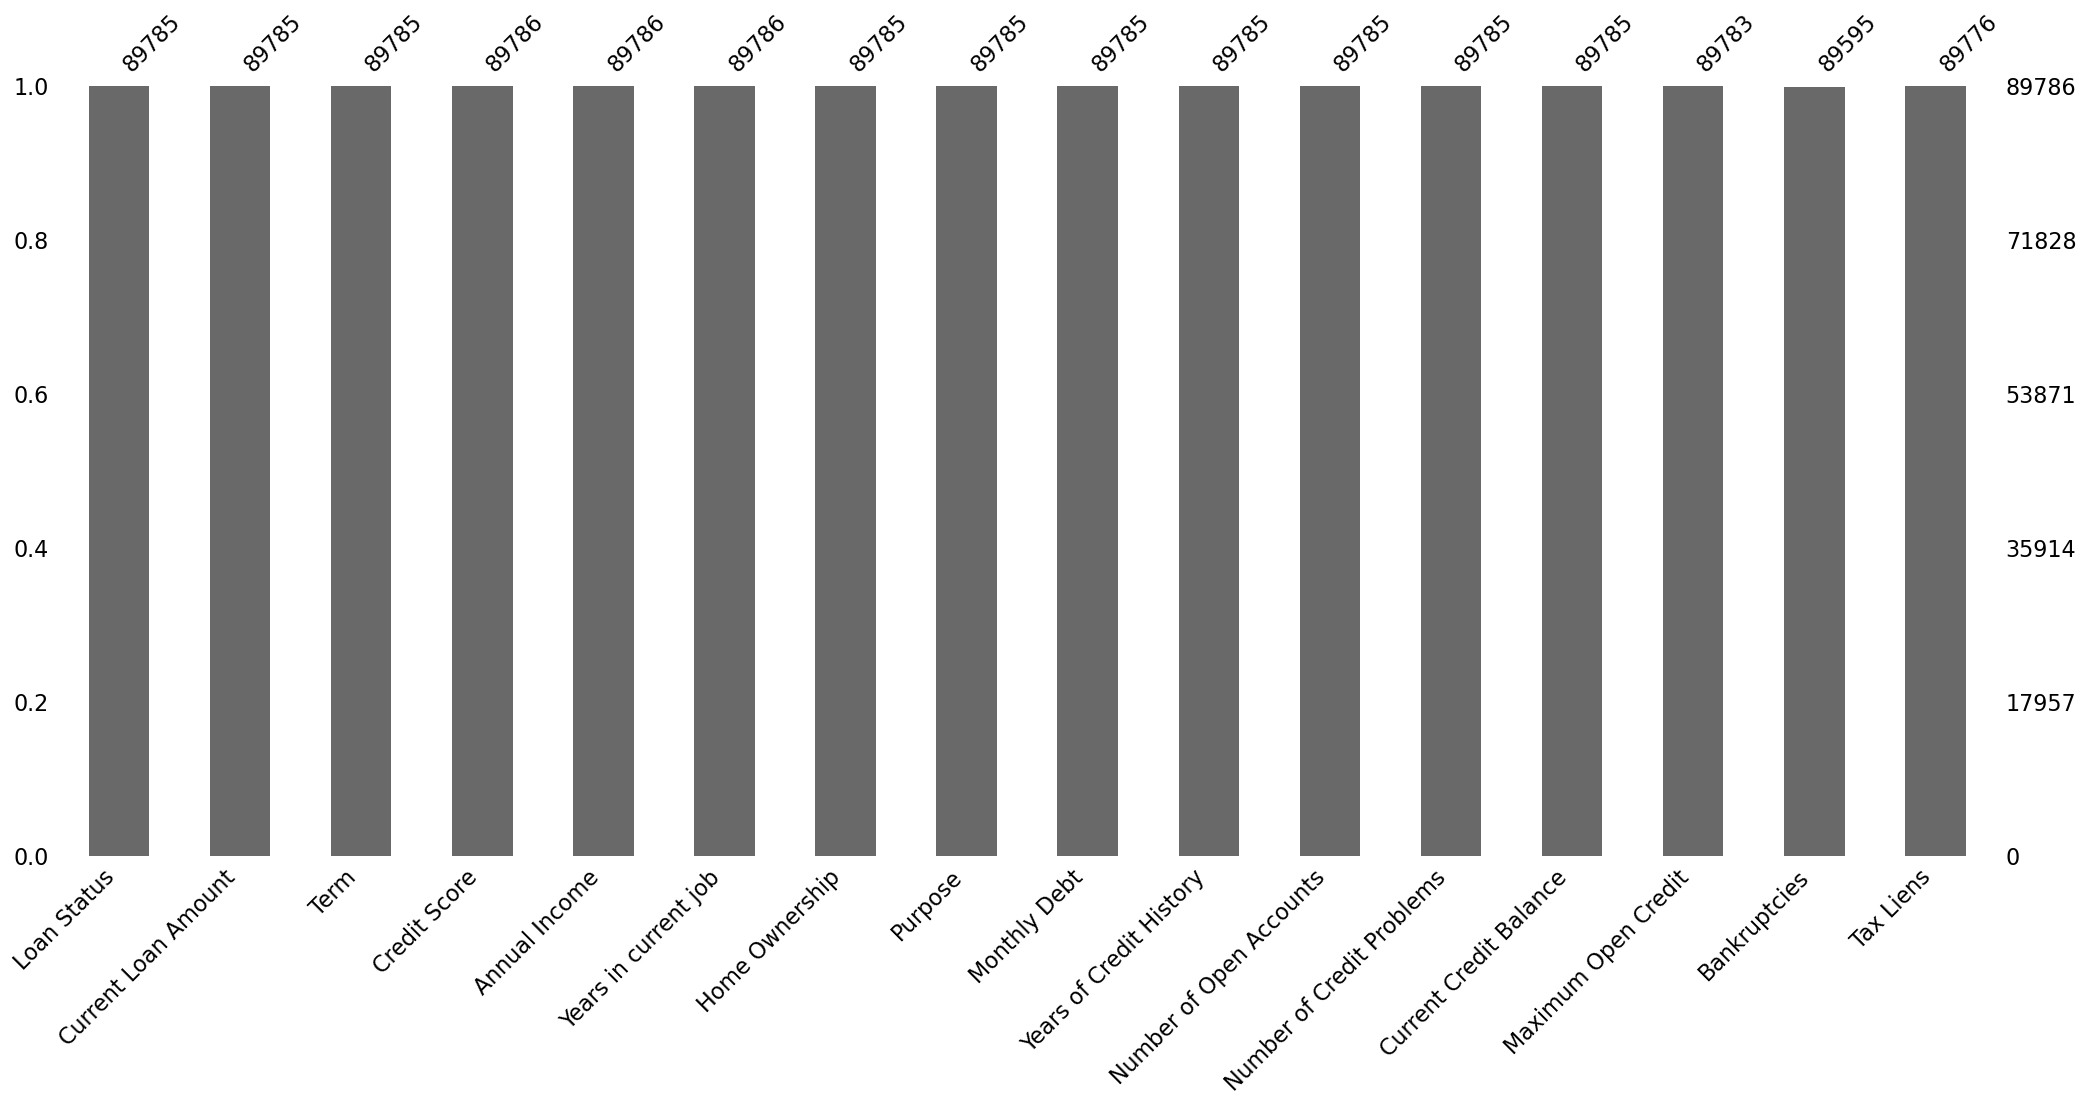

In [25]:
msno.bar(train_data)

In [26]:
train_data.isnull().sum()

Loan Status                    1
Current Loan Amount            1
Term                           1
Credit Score                   0
Annual Income                  0
Years in current job           0
Home Ownership                 1
Purpose                        1
Monthly Debt                   1
Years of Credit History        1
Number of Open Accounts        1
Number of Credit Problems      1
Current Credit Balance         1
Maximum Open Credit            3
Bankruptcies                 191
Tax Liens                     10
dtype: int64

In [27]:
train_data.dropna(inplace=True)

In [28]:
train_data.isnull().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

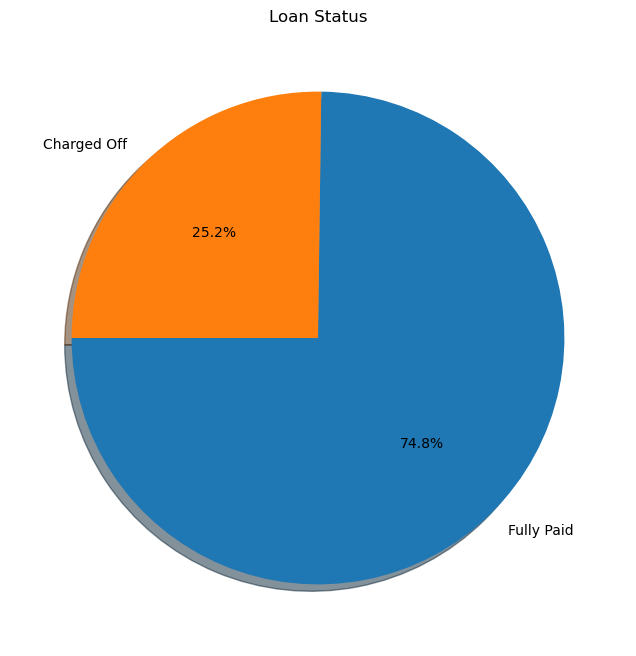

In [29]:
plt.figure(figsize=(8, 8))
plt.title('Loan Status')
Loan = train_data['Loan Status'].value_counts()
plt.pie(Loan, labels=Loan.index, shadow=True,autopct='%1.1f%%', startangle=180)

plt.show()

- The chart shows that 25.2% of loans are charged off, and 74.8% of loans are fully paid.

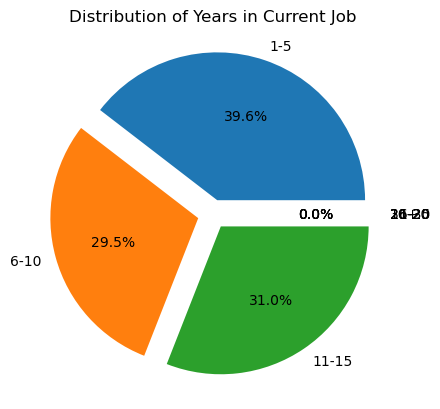

In [30]:
bins = [0, 5, 10, 15, 20, 25, 30, float('inf')]  # Adjust the bin edges as needed

# Create labels for the bins
labels = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '30+']

# Use pd.cut to bin the 'Years in current job' column and create a new column
train_data['Years in current job bins'] = pd.cut(train_data['Years in current job'], bins=bins, labels=labels, right=False)

# Plot the distribution
counts = train_data['Years in current job bins'].value_counts().sort_index()
explode = [0.1] * len(counts)  # You can adjust the explode value if needed

plt.pie(counts, labels=counts.index, autopct='%1.1f%%', explode=explode)
plt.title('Distribution of Years in Current Job')
plt.show()

- Nearly 40% of individuals have been at their current job for 1-5 years. This suggests a significant proportion of the population is relatively early in their career or has recently changed jobs.
  
- Around 30% have been with their current employer for 6-10 years, indicating a moderate level of job stability.
  
- Another 31% have job tenures of 11-15 years, representing a more established workforce.
  
- Notably, no individuals in the sample have been at their current job for 26-30 rs.s. 

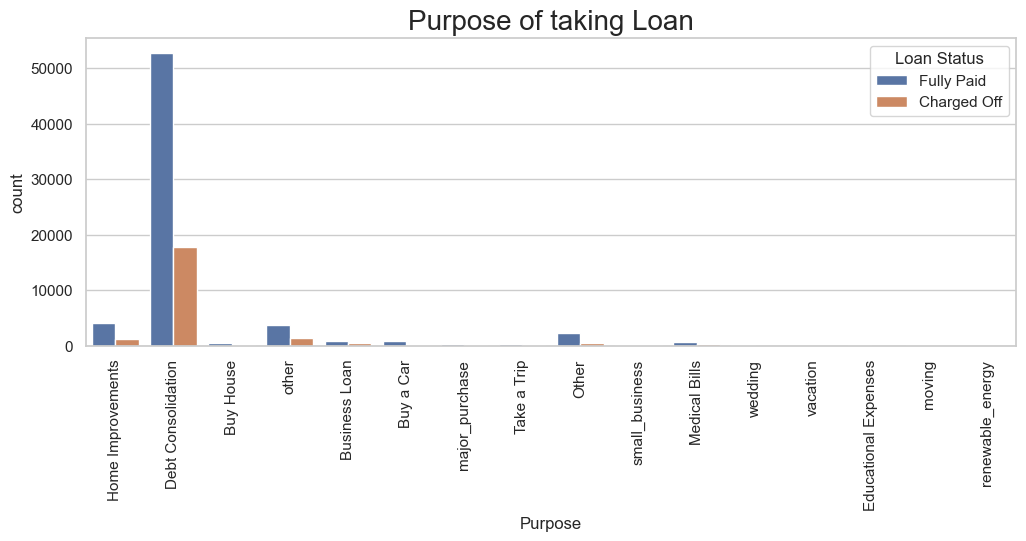

In [32]:
plt.figure(figsize=(12,4))
sns.set(style="whitegrid")
sns.countplot(x='Purpose',data=train_data,hue='Loan Status')
plt.xticks(rotation=90)
plt.title('Purpose of taking Loan',fontdict={'fontsize':20})
plt.show()

- The most common reasons people take out loans are for home improvement, debt consolidation, and buying a house. These purposes together account for over 60% of the loans taken out.
  

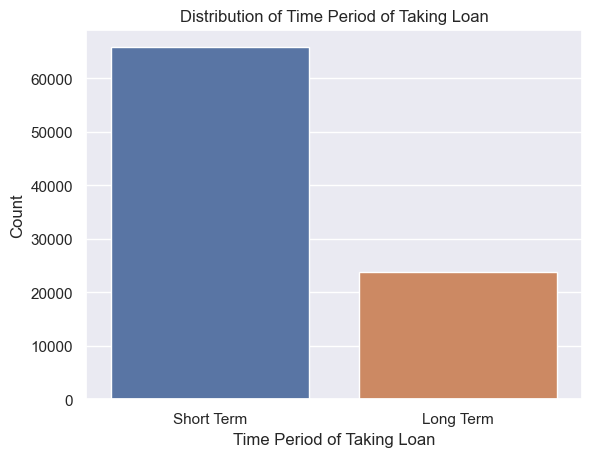

In [34]:
sns.set(style="darkgrid")
sns.countplot(x='Term', data=train_data)
plt.title("Distribution of Time Period of Taking Loan")
plt.xlabel("Time Period of Taking Loan")
plt.ylabel("Count")
plt.show()

- From this we can see that the vast majority of loans fall into the short-term category

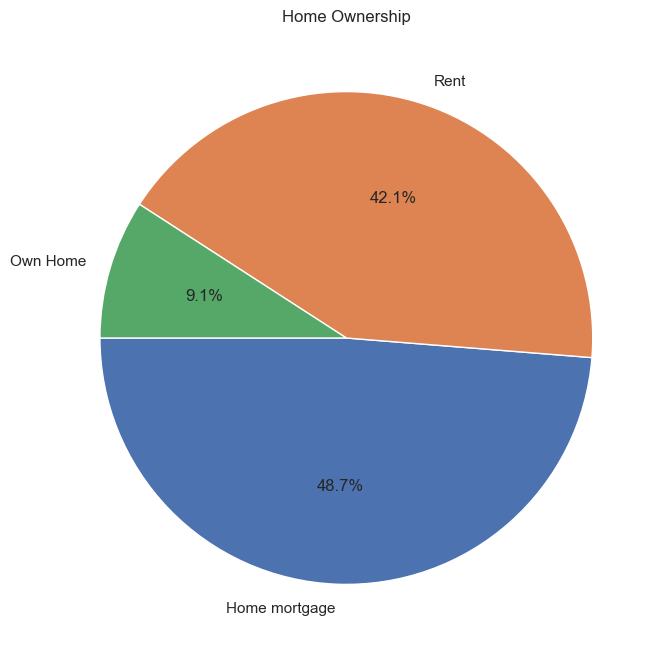

In [35]:
plt.figure(figsize=(8, 8))
train_data['Home Ownership'].replace(['HaveMortgage', 'Home Mortgage'],'Home mortgage', inplace = True)# Home mortgage and Have mortgage are the same meaning
owner = train_data['Home Ownership'].value_counts()
plt.title('Home Ownership')
plt.pie(owner, labels=owner.index, autopct='%1.1f%%', startangle=180)

plt.show()

- The majority of people in the dataset have their homes as mortgages, at 48.7%.


In [36]:
train_data.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Years in current job bins
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8.0,Home mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,6-10
1,Fully Paid,262328.0,Short Term,719.8,1284134.0,10.0,Home mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0,11-15
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0,6-10
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3.0,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,1-5
4,Fully Paid,176220.0,Short Term,725.8,1194070.2,5.0,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0,6-10


<Axes: xlabel='Loan Status', ylabel='count'>

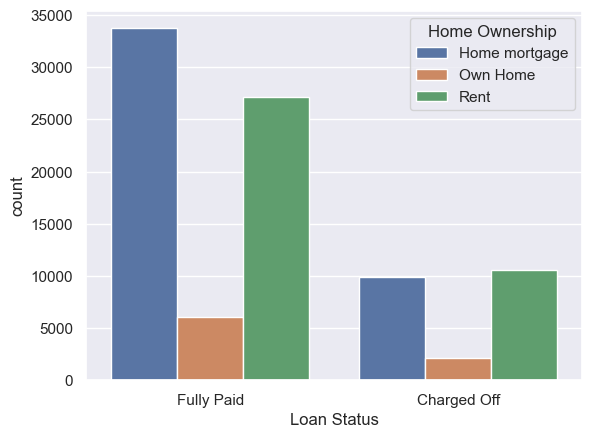

In [37]:
sns.countplot(data=train_data,x='Loan Status',hue='Home Ownership')

<Axes: xlabel='Loan Status', ylabel='count'>

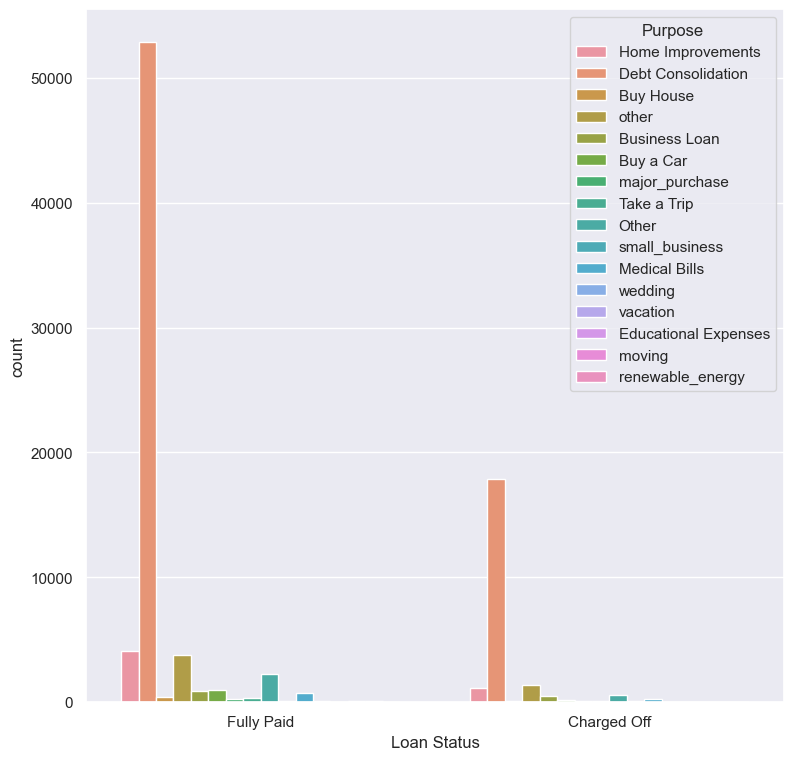

In [38]:
plt.figure(figsize=(9,9))
sns.countplot(data=train_data,x="Loan Status",hue='Purpose')

In [39]:

train_data.drop(columns=['Years in current job bins'], inplace=True)


In [40]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89593 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan Status                89593 non-null  object 
 1   Current Loan Amount        89593 non-null  float64
 2   Term                       89593 non-null  object 
 3   Credit Score               89593 non-null  float64
 4   Annual Income              89593 non-null  float64
 5   Years in current job       89593 non-null  float64
 6   Home Ownership             89593 non-null  object 
 7   Purpose                    89593 non-null  object 
 8   Monthly Debt               89593 non-null  float64
 9   Years of Credit History    89593 non-null  float64
 10  Number of Open Accounts    89593 non-null  float64
 11  Number of Credit Problems  89593 non-null  float64
 12  Current Credit Balance     89593 non-null  float64
 13  Maximum Open Credit        89593 non-null  float64


## Using label encoder to change categorical values to numerical values

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['Loan Status'].value_counts()

Loan Status
Fully Paid     67006
Charged Off    22587
Name: count, dtype: int64

In [42]:
categorical_columns = train_data.select_dtypes('object').columns 
for column in categorical_columns:
    train_data[column] = le.fit_transform(train_data[column])

In [43]:
train_data


,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,445412.0,1,709.0,1167493.0,8.0,0,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1,262328.0,1,719.8,1284134.0,10.0,0,3,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1,99999999.0,1,741.0,2231892.0,8.0,1,3,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1,347666.0,0,721.0,806949.0,3.0,1,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1,176220.0,1,725.8,1194070.2,5.0,2,3,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,1,210584.0,1,719.0,783389.0,1.0,0,7,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0,0.0
99996,1,99999999.0,1,732.0,1289416.0,1.0,2,3,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,1,103136.0,1,742.0,1150545.0,6.0,2,3,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,1,530332.0,1,746.0,1717524.0,9.0,2,3,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0


<Axes: xlabel='Loan Status'>

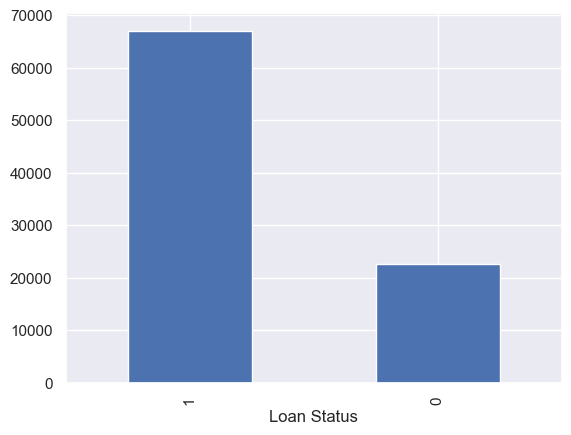

In [44]:
train_data['Loan Status'].value_counts().plot.bar()

In [45]:
train_data.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 89593 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan Status                89593 non-null  int32  
 1   Current Loan Amount        89593 non-null  float64
 2   Term                       89593 non-null  int32  
 3   Credit Score               89593 non-null  float64
 4   Annual Income              89593 non-null  float64
 5   Years in current job       89593 non-null  float64
 6   Home Ownership             89593 non-null  int32  
 7   Purpose                    89593 non-null  int32  
 8   Monthly Debt               89593 non-null  float64
 9   Years of Credit History    89593 non-null  float64
 10  Number of Open Accounts    89593 non-null  float64
 11  Number of Credit Problems  89593 non-null  float64
 12  Current Credit Balance     89593 non-null  float64
 13  Maximum Open Credit        89593 non-null  float64


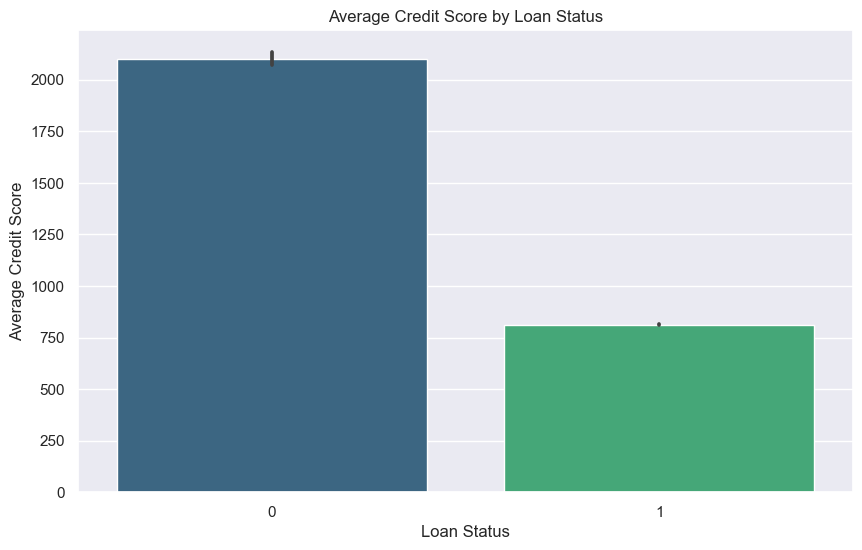

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Loan Status', y='Credit Score', data=train_data, palette='viridis')
plt.title('Average Credit Score by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Average Credit Score')
plt.show()

- People having high credit score fully pay their loan

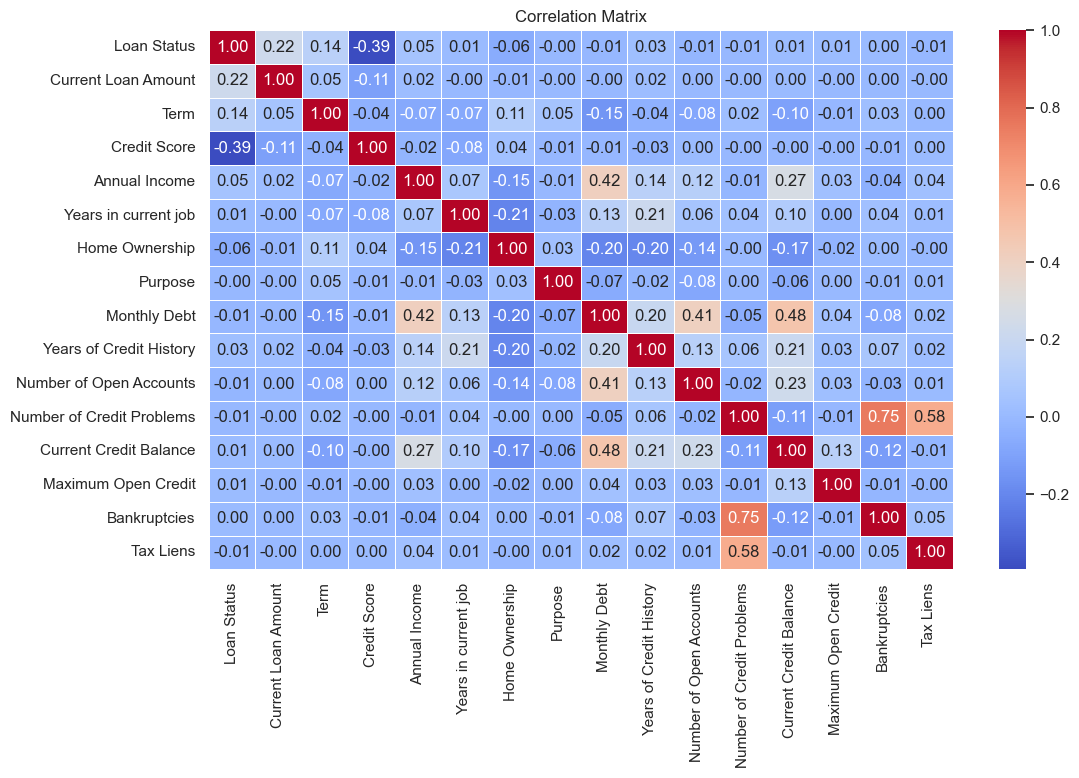

In [47]:
correlation_matrix = train_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

-  now every column is in numerial formal

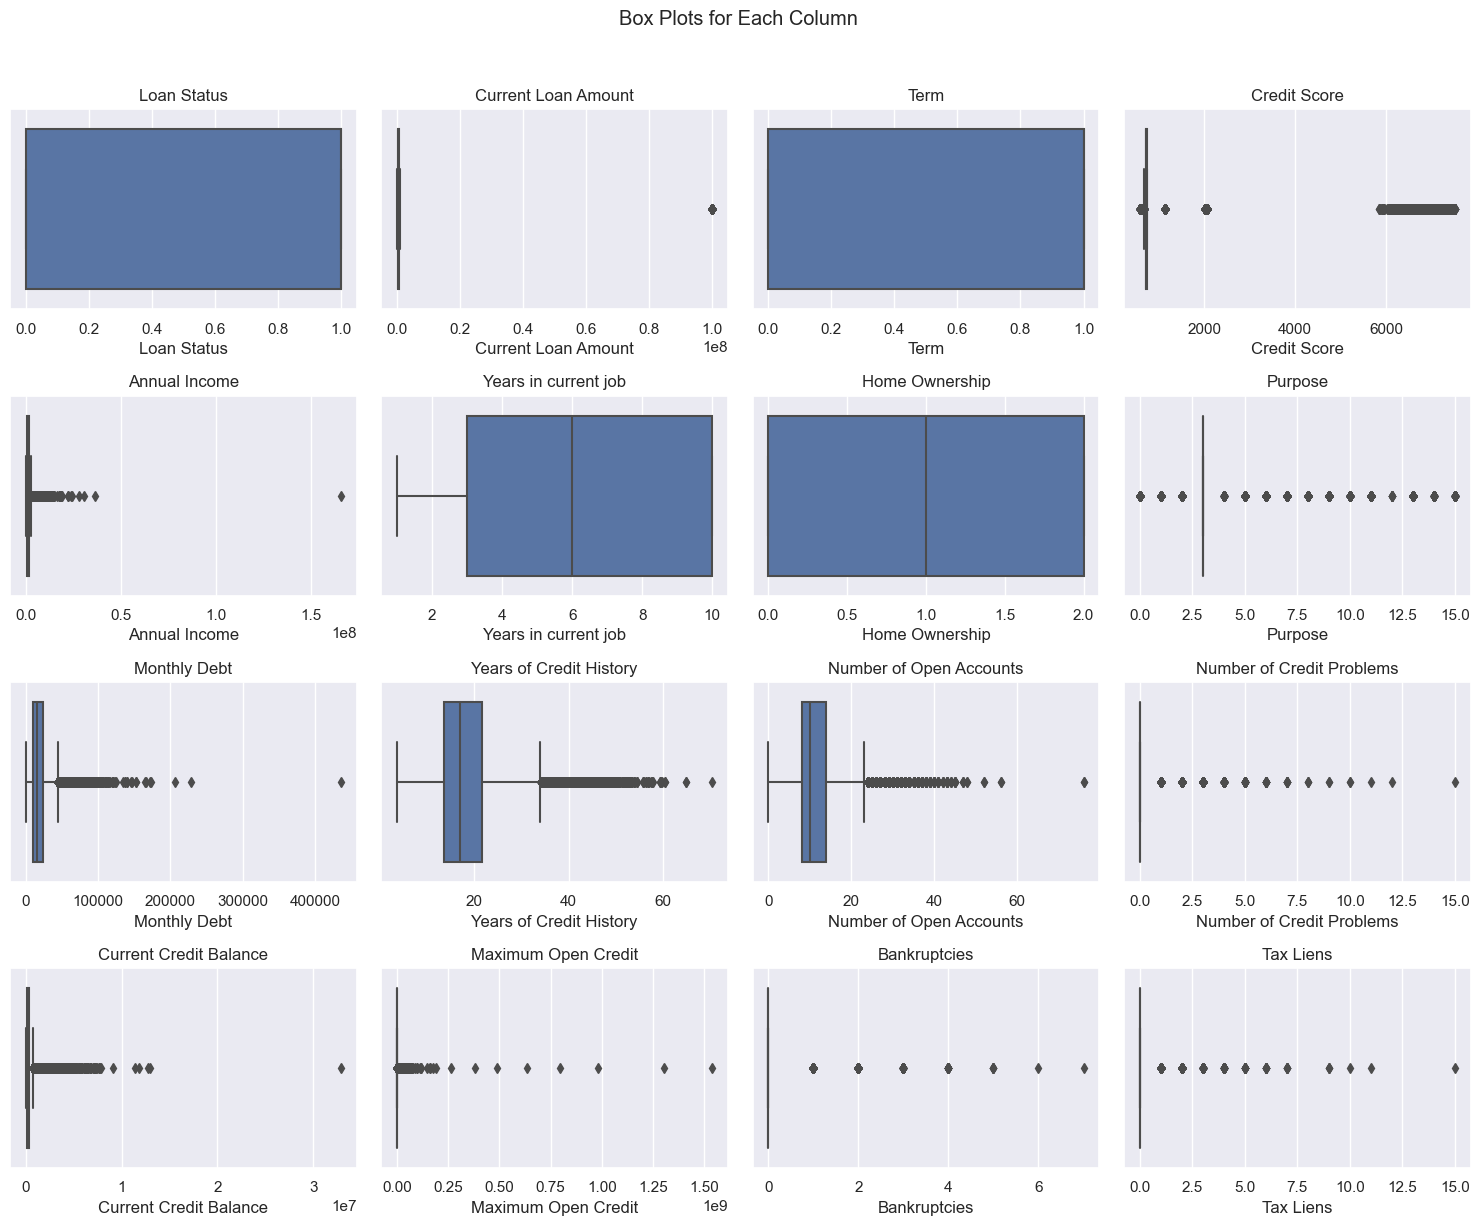

In [48]:
num_cols = 4  # Number of subplots per row
num_rows = (len(train_data.columns) // num_cols) + (len(train_data.columns) % num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))
fig.suptitle('Box Plots for Each Column', y=1.02)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot box plots for each column
for i, col in enumerate(train_data.columns):
    sns.boxplot(x=train_data[col], ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)

# Remove empty subplots if the number of columns is not a multiple of num_cols
if len(train_data.columns) % num_cols != 0:
    for j in range(len(train_data.columns) % num_cols, num_cols):
        fig.delaxes(axes[-j-1])

plt.tight_layout()
plt.show()

- From this we can see that there are outliers presnt in the data

- Since there are outliers it would better to use Robust Scaler to do the Scaling process

## Scaling using Robust Scaler

In [49]:
from sklearn.preprocessing import RobustScaler

columns_to_scale = ['Current Loan Amount', 'Annual Income', 'Monthly Debt', 'Current Credit Balance','Maximum Open Credit'] 

# Initialize the RobustScaler
scaler = RobustScaler()
train_data[columns_to_scale] = scaler.fit_transform(train_data[columns_to_scale])

In [50]:
train_data.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,0.372736,1,709.0,-0.118367,8.0,0,5,-0.794964,17.2,6.0,1.0,0.071999,-0.108753,1.0,0.0
1,1,-0.146934,1,719.8,0.060041,10.0,0,3,1.246502,21.1,35.0,0.0,0.079012,0.735304,0.0,0.0
2,1,282.951012,1,741.0,1.509677,8.0,1,3,0.948769,14.9,18.0,1.0,0.346117,0.539488,0.0,0.0
3,1,0.095292,0,721.0,-0.669834,3.0,1,3,-0.538544,12.0,9.0,0.0,0.182496,-0.166681,0.0,0.0
4,1,-0.391345,1,725.8,-0.077716,5.0,2,3,0.326409,6.1,15.0,0.0,0.171230,-0.088474,0.0,0.0


## Splitting Datasets

In [51]:
X = train_data.drop('Loan Status', axis=1)  # Features
Y = train_data['Loan Status']  # Target variable

In [52]:
Y

0        1
1        1
2        1
3        1
4        1
        ..
99994    1
99996    1
99997    1
99998    1
99999    1
Name: Loan Status, Length: 89593, dtype: int32

In [53]:
X

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,0.372736,1,709.0,-0.118367,8.0,0,5,-0.794964,17.2,6.0,1.0,0.071999,-0.108753,1.0,0.0
1,-0.146934,1,719.8,0.060041,10.0,0,3,1.246502,21.1,35.0,0.0,0.079012,0.735304,0.0,0.0
2,282.951012,1,741.0,1.509677,8.0,1,3,0.948769,14.9,18.0,1.0,0.346117,0.539488,0.0,0.0
3,0.095292,0,721.0,-0.669834,3.0,1,3,-0.538544,12.0,9.0,0.0,0.182496,-0.166681,0.0,0.0
4,-0.391345,1,725.8,-0.077716,5.0,2,3,0.326409,6.1,15.0,0.0,0.171230,-0.088474,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,-0.293805,1,719.0,-0.705870,1.0,0,7,-0.903076,17.4,6.0,0.0,-0.822279,-0.415205,0.0,0.0
99996,282.951012,1,732.0,0.068120,1.0,2,3,-0.221059,9.4,22.0,0.0,-0.223084,0.071105,0.0,0.0
99997,-0.598789,1,742.0,-0.144289,6.0,2,3,-0.642237,18.8,12.0,1.0,-0.393867,0.126166,1.0,0.0
99998,0.613775,1,746.0,0.722929,9.0,2,3,-0.455074,15.0,8.0,0.0,0.763262,0.516471,0.0,0.0


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)


## LOGISTIC REGRESSION

In [55]:
LR=LogisticRegression() #withour solver it reacher the maximum iteration
LR.fit(X_train,y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Step 2: Initialize Model and Grid Search
LR = LogisticRegression(solver='liblinear')
grid_search = GridSearchCV(LR, param_grid, cv=5, scoring='accuracy')

# Step 3: Fit Grid Search
grid_search.fit(X_train, y_train)

# Step 4: Retrieve Best Parameters
best_params = grid_search.best_params_

print("Best Parameters:", best_params)

Best Parameters: {'C': 1, 'penalty': 'l1'}


In [75]:
LR1=LogisticRegression(C=1,penalty='l1',solver='liblinear')
LR1.fit(X_train,y_train)
# Print training and testing accuracies
print("Training Accuracy:", LR1.score(X_train, y_train))
print("Testing Accuracy:", LR1.score(X_test, y_test))

Training Accuracy: 0.7959790161006781
Testing Accuracy: 0.798872704950053


- Since the scores are similar it is not an overfitted model

In [58]:
from sklearn.metrics import classification_report
y_pred = LR1.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.22      0.35      4471
           1       0.79      0.99      0.88     13448

    accuracy                           0.80     17919
   macro avg       0.84      0.61      0.62     17919
weighted avg       0.82      0.80      0.75     17919




    - The model performs well in identifying class 1 instances but struggles with class 0.

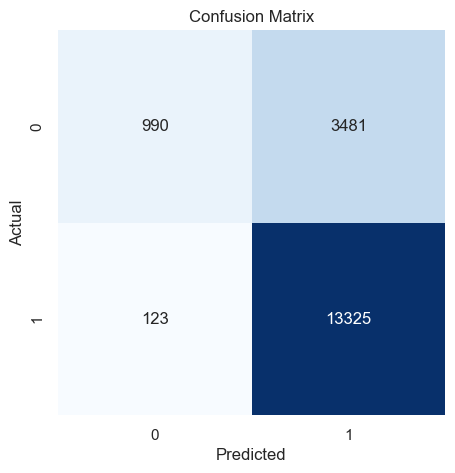

In [59]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## K-Nearest Neighbors 

In [60]:
from sklearn.neighbors import KNeighborsClassifier

KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,y_train)

print("Training Accuracy:", KNN.score(X_train, y_train))
print("Testing Accuracy:", KNN.score(X_test, y_test))

Training Accuracy: 0.8524569578926807
Testing Accuracy: 0.7480886210167979


- Since there is significant change in training and testing accuracy, the model is overfitted. So hyperparameter tuning needs to be done to find the best number for n_neighbors(K) which greatly depends on this model

In [61]:
knn_classifier = KNeighborsClassifier()

# Define the hyperparameters and their possible values
param_grid = {'n_neighbors': [1, 3, 5, 7, 9,11,13]}

# Initialize GridSearchCV
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

# Retrieve the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_neighbors': 13}


In [62]:
KNN=KNeighborsClassifier(n_neighbors=13)
KNN.fit(X_train,y_train)

print("Training Accuracy:", KNN.score(X_train, y_train))
print("Testing Accuracy:", KNN.score(X_test, y_test))

Training Accuracy: 0.8050199514468287
Testing Accuracy: 0.789664601819298


- Here the scores are almost similar

In [63]:
y_pred = KNN.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.72      0.26      0.38      4471
           1       0.80      0.97      0.87     13448

    accuracy                           0.79     17919
   macro avg       0.76      0.61      0.63     17919
weighted avg       0.78      0.79      0.75     17919



- The model excels in identifying class 1 instances with high precision and recall.
- Class 0 predictions have lower recall, indicating a challenge in correctly identifying instances of class 0.
- The overall accuracy is 80%, with balanced macro and weighted average F1-Scores considering class imbalances. s.with class 0.

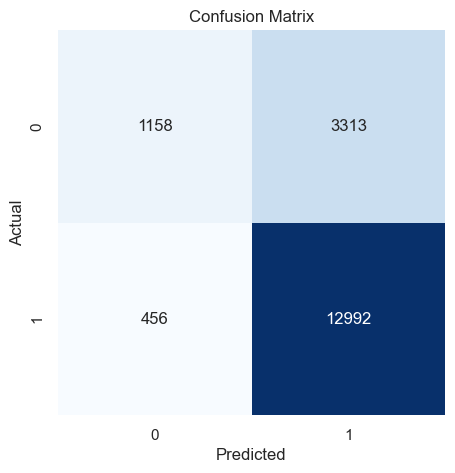

In [64]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Support Vector Machines

In [65]:
from sklearn.svm import SVC

SVM= SVC(C=0.1, kernel='rbf')
SVM.fit(X_train,y_train)
print("Training Accuracy:", SVM.score(X_train, y_train))
print("Testing Accuracy:", SVM.score(X_test, y_test))

Training Accuracy: 0.7977369757513185
Testing Accuracy: 0.8018862659746637


- training and testing scores are almost similar so it is not overfitted.

In [66]:
y_pred = SVM.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.21      0.34      4471
           1       0.79      1.00      0.88     13448

    accuracy                           0.80     17919
   macro avg       0.90      0.60      0.61     17919
weighted avg       0.84      0.80      0.75     17919



- The model performs exceptionally well in predicting class 1 (Fully Paid), achieving high precision, recall, and F1-score.
- However, it struggles with class 0 (Not Fully Paid), with low recall and F1-score, indicating difficulties in capturing instances of class 0.

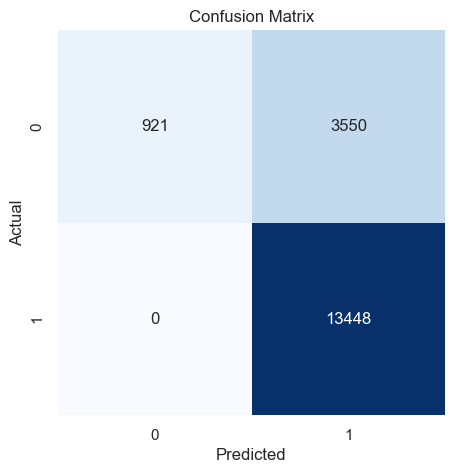

In [67]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## RANDOM FOREST

In [68]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Train the model on your training data
random_forest.fit(X_train, y_train)

print("Training Accuracy:", random_forest.score(X_train, y_train))
print("Testing Accuracy:", random_forest.score(X_test, y_test))

Training Accuracy: 1.0
Testing Accuracy: 0.8018862659746637


- There is significant difference between training and testing scores, so it is a overfitted model. So need to perform hyperparameter tuning

In [69]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Retrieve the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Dell\anaconda3\Lib\site-packages\s

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

In [70]:
rf_classifier = RandomForestClassifier(
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=2,	
    min_samples_split=5,
    n_estimators=100,
    random_state=42  # You can set a random state for reproducibility
)
rf_classifier.fit(X_train, y_train)
print("Training Accuracy:", rf_classifier.score(X_train, y_train))
print("Testing Accuracy:", rf_classifier.score(X_test, y_test))

Training Accuracy: 0.9744398247621173
Testing Accuracy: 0.802611752887996


- After parameter tuning also there is difference in the accuracy score

In [71]:
class_distribution = Y.value_counts()

print("Class Distribution:")
print(class_distribution)

Class Distribution:
Loan Status
1    67006
0    22587
Name: count, dtype: int64


- we can see that the value of Loan_status -0 compared to 1 is low, so it fails to learn much on the data where loan_status should be 0

### SMOTE FOR BALANCING DATA

In [72]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Display value counts after oversampling
print("Class Distribution after SMOTE:")
print(y_train_resampled.value_counts())


Class Distribution after SMOTE:
Loan Status
1    53558
0    53558
Name: count, dtype: int64


- The data is made to be balanced using SMOTE

In [79]:
from sklearn.metrics import accuracy_score
rf_classifier1 = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Calculate training accuracy on the resampled data
train_accuracy_resampled = accuracy_score(y_train_resampled, rf_classifier.predict(X_train_resampled))

# Calculate testing accuracy on the original test data
test_accuracy_original = accuracy_score(y_test, rf_classifier.predict(X_test))

print("Training Accuracy (Resampled):", train_accuracy_resampled)
print("Testing Accuracy (Original):", test_accuracy_original)


Training Accuracy (Resampled): 0.9964804510997424
Testing Accuracy (Original): 0.7593057648306267


In [80]:
y_pred = random_forest.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.84      0.25      0.39      4471
           1       0.80      0.98      0.88     13448

    accuracy                           0.80     17919
   macro avg       0.82      0.62      0.64     17919
weighted avg       0.81      0.80      0.76     17919



- The model performs well in identifying class 1 instances (Loan Status 1) with high precision and recall.
- However, it struggles with class 0 instances, as indicated by the lower recall for class 0 even after doing hyper paramter tuning and balancing
  

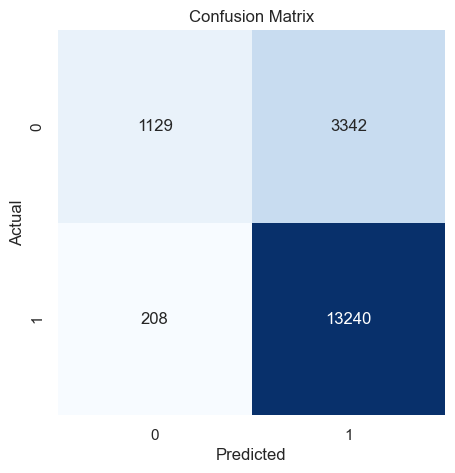

In [81]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## CROSS VALIDATION OF MODELS

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Define the models
svm_model = SVC()
logreg_model = LogisticRegression()
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier()

# List of models
models = [svm_model, logreg_model, knn_model, rf_model]

# Loop through each model
for model in models:
    # Perform cross-validation
    scores = cross_val_score(model, X, Y, cv=5)  # You can adjust the number of folds (cv) as needed
    print(f"Model: {type(model).__name__}")
    print("Cross-Validation Scores:", scores)
    print("Average Accuracy:", scores.mean())
    print("------")


Model: SVC
Cross-Validation Scores: [0.80077013 0.7955243  0.79736592 0.79936377 0.79981025]
Average Accuracy: 0.7985668750936432
------


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Model: LogisticRegression
Cross-Validation Scores: [0.79870528 0.7904459  0.79591495 0.79517803 0.79406184]
Average Accuracy: 0.7948612002887496
------
Model: KNeighborsClassifier
Cross-Validation Scores: [0.75841286 0.7587477  0.75969641 0.7676638  0.76665923]
Average Accuracy: 0.762235998917653
------
Model: RandomForestClassifier
Cross-Validation Scores: [0.79982142 0.79507785 0.79736592 0.79941958 0.79975444]
Average Accuracy: 0.7982878416654385
------


- SVC and Random Forest models exhibit comparable and relatively high average accuracy.
- Logistic Regression follows closely, demonstrating good predictive performance.
- KNN, while still performing reasonably well, has a slightly lower average accuracy compared to the other models.

## ADABOOST 

In [83]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a base model 
base_model = DecisionTreeClassifier(max_depth=1)

# Initialize AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)

# Fit the AdaBoost classifier on the resampled data
adaboost_classifier.fit(X_train_resampled, y_train_resampled)

# Calculate training accuracy on the resampled data
train_accuracy_resampled = accuracy_score(y_train_resampled, adaboost_classifier.predict(X_train_resampled))
print("Training Accuracy on Resampled Data:", train_accuracy_resampled)

# Calculate testing accuracy on the original test data
test_accuracy_original = accuracy_score(y_test, adaboost_classifier.predict(X_test))
print("Testing Accuracy on Original Data:", test_accuracy_original)


Training Accuracy on Resampled Data: 0.7359964897867732
Testing Accuracy on Original Data: 0.7291701545845192


In [84]:
# Predict on the resampled training data
y_train_pred = adaboost_classifier.predict(X_train_resampled)

# Generate the classification report for the resampled training data
report_train_resampled = classification_report(y_train_resampled, y_train_pred)
print("Classification Report on Resampled Training Data:")
print(report_train_resampled)

# Predict on the original test data
y_test_pred = adaboost_classifier.predict(X_test)

# Generate the classification report for the original test data
report_test_original = classification_report(y_test, y_test_pred)
print("\nClassification Report on Original Test Data:")
print(report_test_original)

Classification Report on Resampled Training Data:
              precision    recall  f1-score   support

           0       0.78      0.66      0.71     53558
           1       0.70      0.81      0.76     53558

    accuracy                           0.74    107116
   macro avg       0.74      0.74      0.73    107116
weighted avg       0.74      0.74      0.73    107116


Classification Report on Original Test Data:
              precision    recall  f1-score   support

           0       0.46      0.49      0.47      4471
           1       0.83      0.81      0.82     13448

    accuracy                           0.73     17919
   macro avg       0.64      0.65      0.65     17919
weighted avg       0.74      0.73      0.73     17919



- The model performs reasonably well on the resampled training data, showing a balanced trade-off between precision and recall.
- The model's performance on the original test data is slightly less balanced, particularly in terms of precision for Class 0. The recall for Class 0 is also relatively low, indicating a struggle to correctly identify instances of that class.

## EVALUATION

- Models generally perform well on Class 1, but Class 0 has varying challenges.
- Random Forest and Adaboost show good balance, but further tuning is advisable for Class 0 metrics.
- SVM has a trade-off between precision and recall, especially for Class 0.
- KNN provides a balanced approach with relatively higher recall for Class 1.
- Logistic Regression exhibits high precision and recall for Class 1, but struggles with Class 0 recall.